In [27]:
import pandas as pd

In [28]:
nyc = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

In [29]:
nyc.columns = ['Date', 'Temperature', 'Anomoly']

In [30]:
nyc.Date =nyc.Date.floordiv(100)
nyc.head(5)

,Date,Temperature,Anomoly
0,1895,52.1,-1.8
1,1896,52.3,-1.6
2,1897,52.3,-1.6
3,1898,53.8,-0.1
4,1899,52.7,-1.2


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [32]:
X_train.shape

(92, 1)

In [33]:
X_test.shape

(31, 1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [36]:
linear_regression.coef_

array([0.03157443])

In [37]:
linear_regression.intercept_

-7.892934382133852

In [38]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [40]:
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 54.21, expected: 52.40
predicted: 54.31, expected: 53.70
predicted: 52.86, expected: 51.40
predicted: 53.27, expected: 53.90
predicted: 55.48, expected: 55.40
predicted: 53.90, expected: 54.90
predicted: 52.76, expected: 54.60


In [41]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [42]:
predict(2019)

array([55.85584904])

In [43]:
predict(1890)

array([51.78274698])

In [44]:
predict(2023)

array([55.98214678])

In [45]:
import seaborn as sns

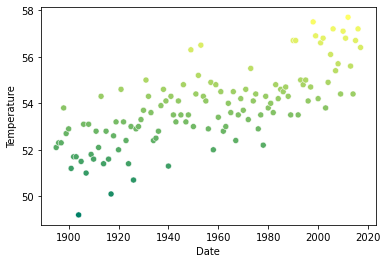

In [47]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='summer', legend=False)

In [48]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [49]:
import numpy as np

In [50]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

In [51]:
import matplotlib.pyplot as plt

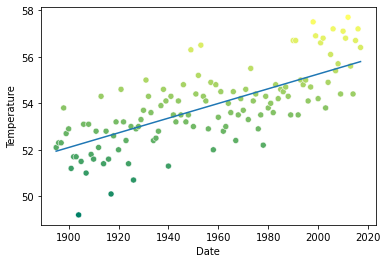

In [53]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='summer', legend=False)
line = plt.plot(x,y)